In [ ]:
#
# The MIT License (MIT)

# Copyright (c) 2021, NVIDIA CORPORATION

# Permission is hereby granted, free of charge, to any person obtaining a copy of
# this software and associated documentation files (the "Software"), to deal in
# the Software without restriction, including without limitation the rights to
# use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of
# the Software, and to permit persons to whom the Software is furnished to do so,
# subject to the following conditions:

# The above copyright notice and this permission notice shall be included in all
# copies or substantial portions of the Software.

# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS
# FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR
# COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER
# IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN
# CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.
#

In [1]:
import pandas as pd
import os
import ast
import numpy as np
import json
from pandas.io.json import json_normalize

In [2]:
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
def convert_str_to_list(x): 
    if pd.isnull(x): 
        return x
    return ast.literal_eval(x)

## Loading data

In [4]:
PATH = '/dataset/sigir_coveo_ecom_datachallenge/SIGIR-ecom-data-challenge'

### Train set

In [7]:
train_browsing_df = pd.read_csv(os.path.join(PATH, 'train/browsing_train.csv'))
len(train_browsing_df)

36079307

In [8]:
train_browsing_df

,session_id_hash,event_type,product_action,product_sku_hash,server_timestamp_epoch_ms,hashed_url
0,20c458b802f6ea9374783bfc528b19421be977a6769785...,event_product,detail,d5157f8bc52965390fa21ad5842a8502bc3eb8b0930f3f...,1550885210881,7e4527ac6a32deed4f4f06bb7c49b907b7ca371e59d57d...
1,20c458b802f6ea9374783bfc528b19421be977a6769785...,event_product,detail,61ef3869355b78e11011f39fc7ac8f8dfb209b3442a9d5...,1550885213307,4ed279f4f0deab6dfc80f4f7bf49d527fd894fa478a9ce...
2,20c458b802f6ea9374783bfc528b19421be977a6769785...,pageview,NaN,NaN,1550885213307,4ed279f4f0deab6dfc80f4f7bf49d527fd894fa478a9ce...
3,20c458b802f6ea9374783bfc528b19421be977a6769785...,event_product,detail,d5157f8bc52965390fa21ad5842a8502bc3eb8b0930f3f...,1550885215484,7e4527ac6a32deed4f4f06bb7c49b907b7ca371e59d57d...
4,20c458b802f6ea9374783bfc528b19421be977a6769785...,pageview,NaN,NaN,1550885215484,7e4527ac6a32deed4f4f06bb7c49b907b7ca371e59d57d...
...,...,...,...,...,...,...
36079302,0676f342dc490b0f8bd9c22d16e4c67f8f7af1f85679f1...,pageview,NaN,NaN,1552162324909,38f5bd3c9a1cc5b39e6b965f1aa6c565737f58e19a560a...
36079303,0676f342dc490b0f8bd9c22d16e4c67f8f7af1f85679f1...,pageview,NaN,NaN,1552162336608,38f5bd3c9a1cc5b39e6b965f1aa6c565737f58e19a560a...
36079304,0676f342dc490b0f8bd9c22d16e4c67f8f7af1f85679f1...,pageview,NaN,NaN,1552162343684,38f5bd3c9a1cc5b39e6b965f1aa6c565737f58e19a560a...
36079305,0676f342dc490b0f8bd9c22d16e4c67f8f7af1f85679f1...,pageview,NaN,NaN,1552162356368,433b0e71df1fe9a8d1f45647545701f6108414c40eef76...


In [204]:
train_browsing_df['server_timestamp_epoch_ms'].agg(['min', 'max'])

min    1547528564513
max    1555300798560
Name: server_timestamp_epoch_ms, dtype: int64

In [12]:
train_search_df = pd.read_csv(os.path.join(PATH, 'train/search_train.csv'))
len(train_search_df)

819516

In [13]:
train_search_items_clicked = train_search_df[~train_search_df['clicked_skus_hash'].isna()]['clicked_skus_hash'].explode().unique()
len(train_search_items_clicked)

73311

In [27]:
train_sku_to_content_df = pd.read_csv(os.path.join(PATH, 'train/sku_to_content.csv'))
len(train_sku_to_content_df)

66386

### Test set

In [26]:
with open(os.path.join(PATH, 'test/rec_test_phase_1.json')) as json_file:
    test_queries = json.load(json_file)
    testset_recommendation_df = pd.json_normalize(test_queries, 'query')
    print(len(testset_recommendation_df))

576435


In [64]:
with open(os.path.join(PATH, 'test/intention_test_phase_1.json')) as json_file:
    test_queries = json.load(json_file)
    testset_purchase_intention_df = pd.json_normalize(test_queries, 'query')
    print(len(testset_purchase_intention_df))

199810


In [203]:
testset_purchase_intention_df['server_timestamp_epoch_ms'].agg(['min', 'max'])

min    1555300858070
max    1557805601238
Name: server_timestamp_epoch_ms, dtype: int64

In [5]:
with open(os.path.join(PATH, 'test/rec_test_phase_2.json')) as json_file:
    test_queries2 = json.load(json_file)
    testset_recommendation_df2 = pd.json_normalize(test_queries2, 'query')
    print(len(testset_recommendation_df2))

1342651


## Analyzing train data

#### Items

In [9]:
train_browsing_items = train_browsing_df['product_sku_hash'].unique()
len(train_browsing_items)

57484

In [94]:
for col in ['product_skus_hash', 'clicked_skus_hash']: 
    train_search_df[col] = train_search_df[col].apply(convert_str_to_list)

In [14]:
train_search_items = train_search_df[~train_search_df['product_skus_hash'].isna()]['product_skus_hash'].explode().unique()
len(train_search_items)

189796

In [100]:
content_items = train_sku_to_content_df['product_sku_hash'].unique()
len(content_items)

66386

In [106]:
len(set(train_browsing_items).difference(set(train_search_items)))

28182

In [107]:
len(set(train_search_items).difference(set(train_browsing_items)))

1097

In [108]:
len(set(train_search_items_clicked).difference(set(train_browsing_items)))

100

In [110]:
set(train_browsing_items).difference(set(content_items))

{nan}

In [111]:
set(train_search_items).difference(set(content_items))

set()

#### Sessions

In [115]:
train_browsing_df['session_id_hash'].nunique()

4934699

In [117]:
len(set(train_browsing_df['session_id_hash'].unique()).difference(set(train_search_df['session_id_hash'].unique())))

4460582

In [118]:
len(set(train_search_df['session_id_hash'].unique()).difference(set(train_browsing_df['session_id_hash'].unique())))

75983

## Comparing train and test data

### Test Items - Phase 1

In [123]:
testset_recommendation_items = testset_recommendation_df['product_skus_hash'].explode().unique()
len(testset_recommendation_items)

19971

In [125]:
len(set(testset_recommendation_items).difference(set(train_browsing_items)))

1213

In [126]:
len(set(testset_recommendation_items).difference(set(train_search_items)))

728

In [127]:
len(set(testset_recommendation_items).difference(set(train_browsing_items).union(set(train_search_items))))

669

### Test Items - Phase 2

In [6]:
testset_recommendation_items = testset_recommendation_df2['product_skus_hash'].explode().unique()
len(testset_recommendation_items)

23225

In [15]:
len(set(testset_recommendation_items).difference(set(train_browsing_items)))

1568

In [16]:
len(set(testset_recommendation_items).difference(set(train_search_items)))

23225

In [17]:
len(set(testset_recommendation_items).difference(set(train_browsing_items).union(set(train_search_items))))

1568

### Session length

In [21]:
train_browsing_sessions_length = train_browsing_df.groupby('session_id_hash').size()

In [74]:
train_browsing_sessions_lengths_dist = train_browsing_sessions_length[train_browsing_sessions_length >= 2] \
                    .describe(percentiles=np.arange(0,1.01, 0.01))
train_browsing_sessions_lengths_dist

count    4.007014e+06
mean     8.772523e+00
std      1.321768e+01
min      2.000000e+00
0%       2.000000e+00
             ...     
97%      4.000000e+01
98%      4.800000e+01
99%      6.500000e+01
100%     2.060000e+02
max      2.060000e+02
Length: 106, dtype: float64

#### Test Set - Phase 1

In [75]:
testset_recommendation_sessions_lengths = testset_recommendation_df.groupby('session_id_hash').size()

In [76]:
testset_recommendation_sessions_lengths_dist = \
            testset_recommendation_sessions_lengths.describe(percentiles=np.arange(0, 1.01, 0.01))
testset_recommendation_sessions_lengths_dist

count    142327.000000
mean          4.050075
std           6.371418
min           1.000000
0%            1.000000
             ...      
97%          19.000000
98%          23.000000
99%          31.000000
100%        133.000000
max         133.000000
Length: 106, dtype: float64

#### Test Set - Phase 2

In [77]:
testset_recommendation_sessions_lengths2 = testset_recommendation_df2.groupby('session_id_hash').size()

In [78]:
testset_recommendation_sessions_lengths_dist2 = \
            testset_recommendation_sessions_lengths2.describe(percentiles=np.arange(0, 1.01, 0.01))
testset_recommendation_sessions_lengths_dist2

count    332247.000000
mean          4.041123
std           6.441325
min           1.000000
0%            1.000000
             ...      
97%          19.000000
98%          23.000000
99%          31.000000
100%        159.000000
max         159.000000
Length: 106, dtype: float64

In [79]:
train_test_sessions_length_cdf_df = pd.concat([train_browsing_sessions_lengths_dist, testset_recommendation_sessions_lengths_dist, testset_recommendation_sessions_lengths_dist2], axis=1)
train_test_sessions_length_cdf_df.columns = ['train', 'test1', 'test2']
train_test_sessions_length_cdf_df['test1/train'] = train_test_sessions_length_cdf_df['test1'] / train_test_sessions_length_cdf_df['train']
train_test_sessions_length_cdf_df['test2/train'] = train_test_sessions_length_cdf_df['test2'] / train_test_sessions_length_cdf_df['train']
train_test_sessions_length_cdf_df[1:]

,train,test1,test2,test1/train,test2/train
mean,8.772523,4.050075,4.041123,0.461677,0.460657
std,13.217676,6.371418,6.441325,0.482038,0.487327
min,2.000000,1.000000,1.000000,0.500000,0.500000
0%,2.000000,1.000000,1.000000,0.500000,0.500000
1%,2.000000,1.000000,1.000000,0.500000,0.500000
...,...,...,...,...,...
97%,40.000000,19.000000,19.000000,0.475000,0.475000
98%,48.000000,23.000000,23.000000,0.479167,0.479167
99%,65.000000,31.000000,31.000000,0.476923,0.476923
100%,206.000000,133.000000,159.000000,0.645631,0.771845


In [80]:
train_test_sessions_length_cdf_df


,train,test1,test2,test1/train,test2/train
count,4.007014e+06,142327.000000,332247.000000,0.035519,0.082916
mean,8.772523e+00,4.050075,4.041123,0.461677,0.460657
std,1.321768e+01,6.371418,6.441325,0.482038,0.487327
min,2.000000e+00,1.000000,1.000000,0.500000,0.500000
0%,2.000000e+00,1.000000,1.000000,0.500000,0.500000
...,...,...,...,...,...
97%,4.000000e+01,19.000000,19.000000,0.475000,0.475000
98%,4.800000e+01,23.000000,23.000000,0.479167,0.479167
99%,6.500000e+01,31.000000,31.000000,0.476923,0.476923
100%,2.060000e+02,133.000000,159.000000,0.645631,0.771845


<AxesSubplot:>

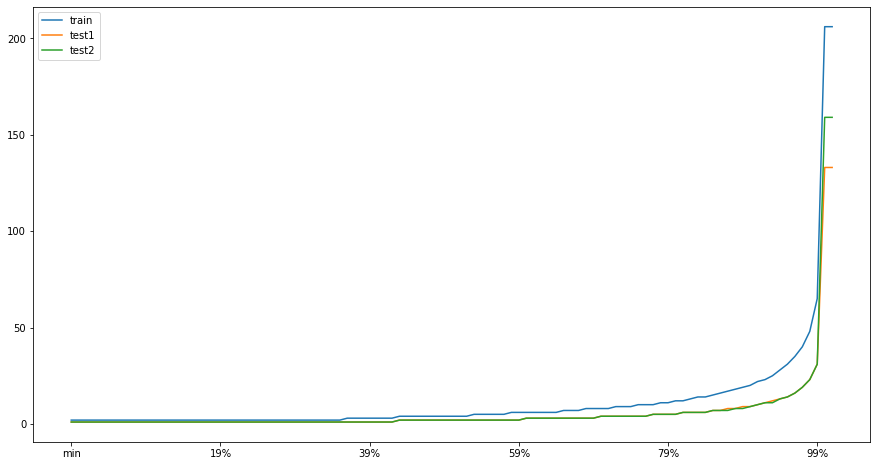

In [81]:
train_test_sessions_length_cdf_df[3:][['train', 'test1', 'test2']].plot.line(figsize=(15,8))

In [201]:
# To see if session with length 1 have also events on search that make then longer, which not holds
train_complete_sessions_df = pd.DataFrame(pd.concat([train_browsing_df['session_id_hash'], train_search_df['session_id_hash']]))
train_complete_sessions_df.groupby('session_id_hash').size().describe(percentiles=np.arange(0,1.05, 0.05))

count    5.010682e+06
mean     7.364032e+00
std      1.239625e+01
min      1.000000e+00
0%       1.000000e+00
5%       1.000000e+00
10%      1.000000e+00
15%      1.000000e+00
20%      2.000000e+00
25%      2.000000e+00
30%      2.000000e+00
35%      2.000000e+00
40%      2.000000e+00
45%      2.000000e+00
50%      3.000000e+00
55%      4.000000e+00
60%      4.000000e+00
65%      5.000000e+00
70%      6.000000e+00
75%      8.000000e+00
80%      1.000000e+01
85%      1.300000e+01
90%      1.800000e+01
95%      2.700000e+01
100%     3.970000e+02
max      3.970000e+02
dtype: float64

### Analyzing repeated interactions

In [17]:
print(len(train_browsing_df))
train_browsing_sorted_df = train_browsing_df[~pd.isna(train_browsing_df['product_sku_hash'])] \
                .sort_values(['session_id_hash', 'server_timestamp_epoch_ms'])
n_train_interactions = len(train_browsing_sorted_df)

36079307
10431611


In [18]:
print(len(testset_recommendation_df))
testset_recommendation_sorted_df = testset_recommendation_df[~pd.isna(testset_recommendation_df['product_sku_hash'])] \
                .sort_values(['session_id_hash', 'server_timestamp_epoch_ms'])
n_test_interactions = len(testset_recommendation_sorted_df)
n_test_interactions

576435
243777


In [36]:
print(len(testset_recommendation_df2))
testset_recommendation_sorted_df2 = testset_recommendation_df2[~pd.isna(testset_recommendation_df2['product_sku_hash'])] \
                .sort_values(['session_id_hash', 'server_timestamp_epoch_ms'])
n_test_interactions2 = len(testset_recommendation_sorted_df2)
n_test_interactions2

1342651


567204

In [19]:
train_browsing_sorted_df['session_id_hash_shifted'] = train_browsing_sorted_df['session_id_hash'].shift(1)
train_browsing_sorted_df['product_sku_hash_shifted'] = train_browsing_sorted_df['product_sku_hash'].shift(1)

In [27]:
n_train_repeated_interactions = len(train_browsing_sorted_df[(train_browsing_sorted_df['session_id_hash_shifted'] == 
                         train_browsing_sorted_df['session_id_hash']) & \
                        (train_browsing_sorted_df['product_sku_hash_shifted'] == 
                         train_browsing_sorted_df['product_sku_hash'])])
print(n_train_repeated_interactions)
n_train_repeated_interactions / n_train_interactions

1360165


0.13038877695880338

In [20]:
testset_recommendation_sorted_df['session_id_hash_shifted'] = testset_recommendation_sorted_df['session_id_hash'].shift(1)
testset_recommendation_sorted_df['product_sku_hash_shifted'] = testset_recommendation_sorted_df['product_sku_hash'].shift(1)

In [28]:
n_test_repeated_interactions = len(testset_recommendation_sorted_df[(testset_recommendation_sorted_df['session_id_hash_shifted'] == 
                         testset_recommendation_sorted_df['session_id_hash']) & \
                        (testset_recommendation_sorted_df['product_sku_hash_shifted'] == 
                         testset_recommendation_sorted_df['product_sku_hash'])])
print(n_test_repeated_interactions)
n_test_repeated_interactions / n_test_interactions

20192


0.08282979936581383

In [38]:
testset_recommendation_sorted_df2['session_id_hash_shifted'] = testset_recommendation_sorted_df2['session_id_hash'].shift(1)
testset_recommendation_sorted_df2['product_sku_hash_shifted'] = testset_recommendation_sorted_df2['product_sku_hash'].shift(1)

In [39]:
n_test_repeated_interactions2 = len(testset_recommendation_sorted_df2[(testset_recommendation_sorted_df2['session_id_hash_shifted'] == 
                         testset_recommendation_sorted_df2['session_id_hash']) & \
                        (testset_recommendation_sorted_df2['product_sku_hash_shifted'] == 
                         testset_recommendation_sorted_df2['product_sku_hash'])])
print(n_test_repeated_interactions2)
n_test_repeated_interactions2 / n_test_interactions2

47666


0.08403678394369574

In [30]:
#train_browsing_sorted_df[['session_id_hash', 'product_sku_hash']].head(1000).to_csv('sessions.csv')

### Comparing other stats of train and test sets

In [47]:
train_search_df

,session_id_hash,query_vector,clicked_skus_hash,product_skus_hash,server_timestamp_epoch_ms
0,48fade624d47870058ce07dd789ccc04e46c70c0fa2a1b...,"[-0.20255649089813232, -0.016908567398786545, ...",NaN,NaN,1548575194779
1,8731ca84ff7bb8cb647531d54e64feedb2519b4a7792a7...,"[-0.007610442116856575, -0.14909175038337708, ...",NaN,['9ee9ffd7e2529a65f9a0b0c9eaae6330df85cf2e3af3...,1548276763869
2,9be980708345944960645d03606ea83b637cae9106b705...,"[-0.20023074746131897, -0.03151938319206238, 0...",NaN,['7cc72dbed53bab78ec6a62feaa5052a7a1db7d201664...,1548937997295
3,9be980708345944960645d03606ea83b637cae9106b705...,"[-0.18556387722492218, -0.07620412111282349, 0...",NaN,['62c4ddab6c1c81c74d315376b3c0dc7768c0286b3dc6...,1548938038268
4,9be980708345944960645d03606ea83b637cae9106b705...,"[-0.03269264101982117, -0.27234694361686707, 0...",NaN,['2a0ee2924feabeec35e21e8fcb4d5b0684d190e46cef...,1548938093827
...,...,...,...,...,...
819511,9b037012702a2dadee910c6b71b691b6ba072b22f41b7b...,"[-0.04411918669939041, -0.15845978260040283, -...",['f023b48bf46355aa4844b8c9bd51e478a22f17b9be83...,['12db169815cb93aaeeb1d427d6c0eea62ba4961e43c4...,1548987598321
819512,9b037012702a2dadee910c6b71b691b6ba072b22f41b7b...,"[-0.033466748893260956, 0.06939797103404999, -...",['1379461daf84128449e010af5f2a0d37837bac53c854...,['956c335d2f59c1853f499420ae4e85250a6c7190a1df...,1548987688646
819513,fdf03b124f6cb368c42a9408bc1186e4ea1465cacd5855...,"[-0.04076826199889183, -0.3194904327392578, 0....",NaN,NaN,1548554188376
819514,fdf03b124f6cb368c42a9408bc1186e4ea1465cacd5855...,"[0.0175111535936594, -0.2686958312988281, 0.07...",NaN,['32ead81a7b89168dc472d162a3d7654db02d99bb88b3...,1548554908239


#### event_type

In [40]:
train_browsing_df[['event_type', 'product_action']] = train_browsing_df[['event_type', 'product_action']].fillna("null")
testset_recommendation_df[['event_type', 'product_action']] = testset_recommendation_df[['event_type', 'product_action']].fillna("null")
testset_recommendation_df2[['event_type', 'product_action']] = testset_recommendation_df2[['event_type', 'product_action']].fillna("null")

In [41]:
train_browsing_df.groupby('event_type').size() / train_browsing_df.groupby('event_type').size().sum()

event_type
event_product    0.28913
pageview         0.71087
dtype: float64

In [47]:
testset_recommendation_df.groupby('event_type').size() / testset_recommendation_df.groupby('event_type').size().sum()

event_type
event_product    0.422905
null             0.029351
pageview         0.547744
dtype: float64

In [41]:
testset_recommendation_df2.groupby('event_type').size() / testset_recommendation_df2.groupby('event_type').size().sum()

event_type
event_product    0.422451
null             0.029317
pageview         0.548232
dtype: float64

#### product_action

In [43]:
train_browsing_df.groupby('product_action').size() / train_browsing_df.groupby('product_action').size().sum()

product_action
add         0.009134
detail      0.269071
null        0.710870
purchase    0.002158
remove      0.008767
dtype: float64

In [44]:
testset_recommendation_df.groupby('product_action').size() / testset_recommendation_df.groupby('product_action').size().sum()

product_action
add         0.011476
detail      0.407541
null        0.577095
purchase    0.000664
remove      0.003223
dtype: float64

In [42]:
testset_recommendation_df2.groupby('product_action').size() / testset_recommendation_df2.groupby('product_action').size().sum()

product_action
add         0.011742
detail      0.407170
null        0.577549
purchase    0.000591
remove      0.002947
dtype: float64

#### product_sku_hash

In [49]:
train_browsing_df['product_sku_hash'].isna().mean()

0.7108699731954385

In [50]:
testset_recommendation_df[testset_recommendation_df['is_search']==False]['product_sku_hash'].isna().mean()

0.5643073656517419

In [52]:
testset_recommendation_df2[testset_recommendation_df2['is_search']==False]['product_sku_hash'].isna().mean()

0.5647899773495958

In [31]:
train_browsing_df

,session_id_hash,event_type,product_action,product_sku_hash,server_timestamp_epoch_ms,hashed_url
0,20c458b802f6ea9374783bfc528b19421be977a6769785...,event_product,detail,d5157f8bc52965390fa21ad5842a8502bc3eb8b0930f3f...,1550885210881,7e4527ac6a32deed4f4f06bb7c49b907b7ca371e59d57d...
1,20c458b802f6ea9374783bfc528b19421be977a6769785...,event_product,detail,61ef3869355b78e11011f39fc7ac8f8dfb209b3442a9d5...,1550885213307,4ed279f4f0deab6dfc80f4f7bf49d527fd894fa478a9ce...
2,20c458b802f6ea9374783bfc528b19421be977a6769785...,pageview,NaN,NaN,1550885213307,4ed279f4f0deab6dfc80f4f7bf49d527fd894fa478a9ce...
3,20c458b802f6ea9374783bfc528b19421be977a6769785...,event_product,detail,d5157f8bc52965390fa21ad5842a8502bc3eb8b0930f3f...,1550885215484,7e4527ac6a32deed4f4f06bb7c49b907b7ca371e59d57d...
4,20c458b802f6ea9374783bfc528b19421be977a6769785...,pageview,NaN,NaN,1550885215484,7e4527ac6a32deed4f4f06bb7c49b907b7ca371e59d57d...
...,...,...,...,...,...,...
36079302,0676f342dc490b0f8bd9c22d16e4c67f8f7af1f85679f1...,pageview,NaN,NaN,1552162324909,38f5bd3c9a1cc5b39e6b965f1aa6c565737f58e19a560a...
36079303,0676f342dc490b0f8bd9c22d16e4c67f8f7af1f85679f1...,pageview,NaN,NaN,1552162336608,38f5bd3c9a1cc5b39e6b965f1aa6c565737f58e19a560a...
36079304,0676f342dc490b0f8bd9c22d16e4c67f8f7af1f85679f1...,pageview,NaN,NaN,1552162343684,38f5bd3c9a1cc5b39e6b965f1aa6c565737f58e19a560a...
36079305,0676f342dc490b0f8bd9c22d16e4c67f8f7af1f85679f1...,pageview,NaN,NaN,1552162356368,433b0e71df1fe9a8d1f45647545701f6108414c40eef76...


In [39]:
testset_recommendation_df

,session_id_hash,query_vector,clicked_skus_hash,product_skus_hash,server_timestamp_epoch_ms,event_type,product_action,product_sku_hash,hashed_url,is_search
0,000028429ab6afd40f2a4d59c183ea46390fdfa3d04c80...,None,None,None,1557432435044,event_product,detail,4641de8468a39c53a151e8ee5f3bd731e69b3d7ac61335...,4f7f239c607d10b0843ceeccb98aecb382f8c18a931758...,False
1,000074f533a4fb893af451e4d436d326ddd2a7e83151a9...,None,None,None,1555443439867,event_product,detail,7571fbadb886e669ea4ac666b585fcc798c1f5970867c5...,0301401ac53e67e319036bbb0c12a4715ec5df45614023...,False
2,0000a6d196680bebf931ad7670f479c5c5357b3f1f8943...,None,None,None,1556729588695,pageview,None,None,9cfe9b259c3c4029a5d20e3542905d07ccf50d9a3bd4d7...,False
3,000106ea084ce19705d7d6889dfd3cb4bd2d596c8b31bd...,"[0.0711296796798706, 0.3248276710510254, 0.023...",None,[cdcfae35b9136964fffa164db83293bc22ccc5cb8572b...,1557259563467,None,None,None,None,True
4,000106ea084ce19705d7d6889dfd3cb4bd2d596c8b31bd...,"[-0.1051841750741005, 0.05710870400071144, -0....",None,[2d56a573739252332916de9219adfa0cf4e33c306c03b...,1557259580980,None,None,None,None,True
...,...,...,...,...,...,...,...,...,...,...
576430,fffe75a4f9e8b6dead0825d7db7fd538a64bc117599030...,None,None,None,1557406201853,pageview,None,None,41ae0f916406434064aeb03d859a7141b53d2900394dca...,False
576431,fffe75a4f9e8b6dead0825d7db7fd538a64bc117599030...,None,None,None,1557406412461,event_product,detail,a1d1d5f08b46a3f88d51e0a025c8d9efc7d670f2d5a974...,a71936368619e41471e8aa88c44a73b24d3dec3fe1b9b6...,False
576432,fffe75a4f9e8b6dead0825d7db7fd538a64bc117599030...,None,None,None,1557406442986,event_product,detail,4e880bf467dcb699fd61519bc3845dd6524b2095d45e7f...,c3eb53ea31db5ba124449624561969376aceb63297ce18...,False
576433,ffff39e95bd7ebc272897b54865d60accb111e0ec42cc0...,None,None,None,1557337655966,event_product,detail,3a62198d671b861ee178dd025f321ac66c28ba2e6967c6...,d4bb262e543866324b517cf4e294c77d270cfabe5d5f4f...,False


In [44]:
testset_recommendation_df2

,session_id_hash,query_vector,clicked_skus_hash,product_skus_hash,server_timestamp_epoch_ms,event_type,product_action,product_sku_hash,hashed_url,is_search
0,000001cc2b6d024f5c1d93536c2f22e7adb3f390ff0212...,None,None,None,1557247655055,event_product,detail,bcec4bf55cb2f4db39c5879275c5ed222beb4b2594d4ad...,8b1bbbcf517f7a82d881a9bc3683043946b6b289f5afd7...,False
1,000064267054198e2f5744100c27111c0d0d585dd73e7e...,None,None,None,1556250432707,event_product,detail,e1d919d93793d553de030e9f6c7524a7db96f5b4596881...,45adb775d9cb21b5bb8632aca30776bc75eb87c8ee1fd8...,False
2,000064267054198e2f5744100c27111c0d0d585dd73e7e...,None,None,None,1556250466867,event_product,detail,9ce84651a32cf3e8bf5dd782f3664693b92403e7abc8d2...,a8edd7e105e2bc9be3ac8d5aa5737b1ad19d4de4459679...,False
3,0000976bb88afb92b355acdad71a8951472b1c611d31c4...,None,None,None,1556994791209,pageview,null,None,433b0e71df1fe9a8d1f45647545701f6108414c40eef76...,False
4,0000976bb88afb92b355acdad71a8951472b1c611d31c4...,None,None,None,1556994800476,pageview,null,None,199df805067b2151516282e63935b19a1845b93bf2ebbb...,False
...,...,...,...,...,...,...,...,...,...,...
1342646,ffff4ebcfe1a162ae0ee4d33c573fd373ffd09e3595295...,None,None,None,1557369241429,event_product,detail,527fe77d65a94b2994c6d5a4c0255804a7f11118e87033...,b09f7ea3d74c95acf0f548ba2d6419e24af56fe5aa36c5...,False
1342647,ffff4ebcfe1a162ae0ee4d33c573fd373ffd09e3595295...,None,None,None,1557369275425,event_product,detail,695ea038afc9ce9917ee7a5da11376187261e5b46aee6b...,5331d77a5d9afcdd593698bb2ac61c4a85f41c6f7645ab...,False
1342648,ffff4ebcfe1a162ae0ee4d33c573fd373ffd09e3595295...,None,None,None,1557369282615,event_product,detail,05f67e6804322bfdaf46caf04ef0be5386ec85d487e0db...,351b74fd01e1b7a5a77bf8c8b6786ae48dbb2401ed28bd...,False
1342649,ffff4ebcfe1a162ae0ee4d33c573fd373ffd09e3595295...,None,None,None,1557369290441,event_product,detail,2c9afec211078e452b88ee9997997c7cf1225efad9adf8...,5f683df0f7f46f055518baab8ab64561926245a87c1f9c...,False
